# Librerías

In [374]:
# Librerías del sistema
import os

# Manipulación de datos
import cv2
import numpy as np

# Visualización de graficos
import matplotlib.pyplot as plt

# Ignorar Warnings
import warnings
warnings.filterwarnings("ignore")

# 1. Simulate any random rectangular matrix A

In [375]:
A = np.random.rand(3,5)
A

array([[0.34704807, 0.78230935, 0.03701269, 0.50010145, 0.36640235],
       [0.94453779, 0.78181465, 0.53864275, 0.19828114, 0.42778892],
       [0.27119857, 0.16740883, 0.55464706, 0.7861704 , 0.58833004]])

In [376]:
# 1.1  What is the rank and trace of A?
print(f'The rank of A matrix is: ', np.linalg.matrix_rank(A))
print(f'The trace of A matrix is: ', np.trace(A))

The rank of A matrix is:  3
The trace of A matrix is:  1.6835097779056007


In [377]:
# 1.2 What is the determinant of A?
# print(f'The determinant of A matrix is: ', np.linalg.det(A))

print('LinAlgError: Last 2 dimensions of the array must be square')

LinAlgError: Last 2 dimensions of the array must be square


In [378]:
# 1.3 Can you invert A? How?

# print(f'The inverse of A matrix is: \n', np.linalg.inv(A))
A_inverse = np.linalg.pinv(A)
print(f'The pseudo-inverse of A matrix is: \n\n', A_inverse)

# inv: lineal no se puede porque no es cuadrada ni tiene determinante
# p: calcula una pseudoinversa con pérdida computacional

The pseudo-inverse of A matrix is: 

 [[-0.48130138  0.86098685 -0.18856325]
 [ 1.11423943  0.04564899 -0.60757482]
 [-1.04946458  0.57505673  0.59888169]
 [ 0.62608964 -0.66579838  0.7129965 ]
 [ 0.05755958 -0.06231705  0.44217828]]


In [379]:
# Calculating A_T
A_T = np.transpose(A)
A_T

array([[0.34704807, 0.94453779, 0.27119857],
       [0.78230935, 0.78181465, 0.16740883],
       [0.03701269, 0.53864275, 0.55464706],
       [0.50010145, 0.19828114, 0.7861704 ],
       [0.36640235, 0.42778892, 0.58833004]])

In [380]:
# 1.4 How are eigenvalues and eigenvectors

# Eigen values and vector of AA_T
eigenvalues, eigenvectors = np.linalg.eig(A @ A_T)
print('The eigenvalues of A * A_T : \n', eigenvalues)
print('\n The eigenvectors of A * A_T : \n', eigenvectors)

The eigenvalues of A * A_T : 
 [3.69126849 0.25633626 0.55981206]

 The eigenvectors of A * A_T : 
 [[ 0.49989706  0.85948411 -0.10672391]
 [ 0.69757717 -0.47260071 -0.53854866]
 [ 0.51331181 -0.19477073  0.8358082 ]]


In [381]:
# 1.4 How are eigenvalues and eigenvectors

# Eigen values and vector of A_T*A
eigenvalues, eigenvectors = np.linalg.eig(A_T @ A)

print('The eigenvalues of A_T * A : \n', eigenvalues)
print('\n The eigenvalues of A_T * A : \n', eigenvectors)

The eigenvalues of A_T * A : 
 [ 3.69126849e+00  5.59812059e-01  2.56336255e-01  1.70141786e-17
 -1.98009177e-17]

 The eigenvalues of A_T * A : 
 [[ 0.50570042  0.42641725  0.39685922  0.49094125 -0.62442829]
 [ 0.53213994  0.48731863 -0.53385693 -0.41324732  0.43652968]
 [ 0.35338876 -0.22659951  0.65333272 -0.62406634  0.5900406 ]
 [ 0.41215824 -0.66416323 -0.36144517  0.02586589 -0.26423334]
 [ 0.40784328 -0.29703326  0.00364572  0.44505674 -0.03954706]]


# 2. Add a steady, well-centered picture of your face to a shared folder alongside your classmates.


In [382]:
# Análisis exploratorio de las imágenes
original_img = cv2.imread("melissa_ortega_color.jpeg")

# Definir parámetros
img_size = (original_img.shape[0], original_img.shape[1])

# Imprimir características de la imágen aleatoria
print(f"El tamaño de la figura es: {img_size} pixeles" )
print(f"La figuras es de tipo: {original_img.dtype}")
print(f"La figura tiene pixeles en el rango: {original_img.min()} - {original_img.max()}")

El tamaño de la figura es: (1000, 1000) pixeles
La figuras es de tipo: uint8
La figura tiene pixeles en el rango: 0 - 255


In [383]:
# Redimensionar la imagen
edited_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2GRAY)
edited_img = cv2.resize(edited_img, (256, 256))
img_size_resize = (edited_img.shape[0], edited_img.shape[1])
print(f"\nEl nuevo tamaño de la figura es: {img_size_resize} pixeles" )


El nuevo tamaño de la figura es: (256, 256) pixeles


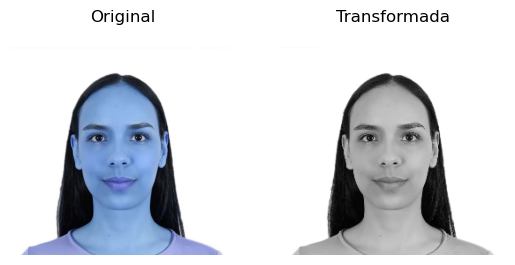

True

In [384]:
# Mostrar la imagen original
plt.subplot(1, 2, 1)
plt.imshow(original_img)
plt.title('Original')
plt.axis('off')

# Mostrar la imagen transformada
plt.subplot(1, 2, 2)
plt.imshow(edited_img, cmap='gray')
plt.title('Transformada')
plt.axis('off')

# Mostrar la figura
plt.show()

# Exportar la imágen
cv2.imwrite('melissa_ortega.jpg', edited_img)

In [385]:
# Obtener la lista de nombres de archivos en el directorio 'images'
images = os.listdir('images')
faces = []

# Leer las imágenes y redimensionarlas
for i in images:
    image_path = os.path.join('images', i)
    img = cv2.imread(image_path)

    if img is not None:
        img_resized = cv2.resize(img, (256, 256))  # Redimensionar a 256x256
        faces.append(img_resized)

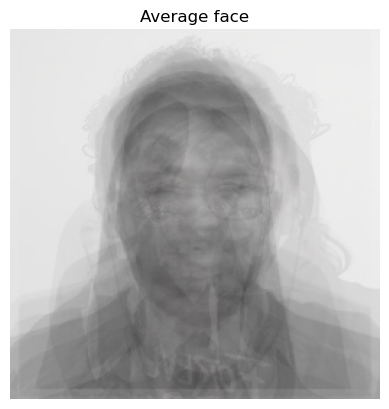

In [386]:
# Convertir la lista de imágenes a un array numpy
faces_array = np.array(faces)

# Calcular el promedio del rostro del grupo
average_face = np.mean(faces_array, axis=0)

# Mostrar la imagen promedio
plt.imshow(average_face.astype(np.uint8))
plt.title('Average face')
plt.axis('off') 
plt.show()

In [387]:
# Convertir la imagen promedio a un tipo de datos adecuado
average_face = np.uint8(average_face)

# Convertir la imagen promedio a escala de grises
average_face = cv2.cvtColor(average_face, cv2.COLOR_BGR2GRAY)


In [388]:
# Calculate the squared differences between corresponding pixels
squared_diffs = (edited_img - average_face) ** 2

# Calculate the mean squared difference
mean_squared_diff = np.mean(squared_diffs)

# Calculate the root mean squared difference
root_mean_squared_diff = np.sqrt(mean_squared_diff)

print("Root mean squared difference:", root_mean_squared_diff)

Root mean squared difference: 10.399984770543611


La "diferencia cuadrática media" (Root Mean Squared Error, RMSE) entre dos imágenes es una medida de la diferencia promedio entre los valores de píxeles correspondientes en ambas imágenes.

Cuando se calcula la diferencia cuadrática entre dos imágenes, primero se calcula la diferencia entre los valores de píxeles correspondientes en cada posición, luego se eleva al cuadrado esta diferencia. Luego, se calcula la media de estas diferencias cuadráticas y se toma la raíz cuadrada de este valor para obtener el RMSE. El RMSE es una métrica comúnmente utilizada en problemas de regresión para evaluar la diferencia entre los valores predichos y los valores observados. En el contexto de imágenes, el RMSE puede proporcionar una medida cuantitativa de cuán diferentes son dos imágenes, teniendo en cuenta tanto la magnitud como la dirección de las diferencias entre los valores de píxeles. Un valor de RMSE más bajo indica que las dos imágenes son más similares entre sí, ya que hay menos diferencia entre los valores de píxeles correspondientes. Un valor de RMSE más alto indica que las dos imágenes son más diferentes entre sí, ya que hay una mayor diferencia entre los valores de píxeles correspondientes.

El rango de valores del RMSE depende del rango de valores de los píxeles en las imágenes que se están comparando. En general, el RMSE puede variar desde 0 hasta un valor máximo, donde un valor de 0 indica que las dos imágenes son idénticas y un valor más alto indica una mayor discrepancia entre las imágenes.

Otra forma de calcular la distancia entre dos imágenes es utilizando la diferencia absoluta entre los valores de píxeles de cada imagen y luego tomando la media de estas diferencias. Esto se conoce como la "diferencia absoluta media" (Mean Absolute Difference, MAD). Primero, calculamos la diferencia absoluta entre las dos imágenes utilizando np.abs(), que nos da una matriz de las diferencias absolutas de los valores de píxeles en cada posición. Luego, calculamos la media de estas diferencias utilizando np.mean() para obtener la diferencia absoluta media.

Esta es otra forma de medir la distancia entre dos imágenes, y puede ser útil en algunos casos, especialmente si estás interesado en la magnitud total de las diferencias entre las imágenes, independientemente de su dirección. Cuanto mayor sea el valor de la diferencia absoluta media, mayor será la discrepancia entre las imágenes. Por otro lado, una diferencia absoluta media más baja indica una mayor similitud entre las imágenes.

In [389]:

mad = np.mean(np.abs(edited_img - average_face))                # Diferencia absoluta media
manhattan_distance = np.sum(np.abs(edited_img - average_face))  # Distancia de Manhattan
euclidean_distance = np.linalg.norm(edited_img - average_face)  # Distancia euclidiana

print("Diferencia absoluta media:", mad)
print("Distancia euclidiana:", euclidean_distance)
print("Distancia de Manhattan:", manhattan_distance)

Diferencia absoluta media: 63.56004333496094
Distancia euclidiana: 21042.049353615726
Distancia de Manhattan: 4165471


La distancia de Manhattan entre dos imágenes es una medida de cuánto difieren las imágenes en términos de los valores de sus píxeles. Se calcula sumando las diferencias absolutas entre los valores de píxeles correspondientes en cada píxel de las imágenes. El resultado es una cantidad que indica la suma total de las diferencias en los valores de los píxeles entre las imágenes. No tiene un rango definido como la distancia euclidiana y su valor dependerá de la magnitud de las diferencias en los valores de píxeles entre las imágenes que se están comparando.

# 3. The unsupervised Python package

# 4. Apply SVD

# 5. Train a naive logistic regression on raw MNIST images

# 6. Now, apply dimensionality reduction using all your algorithms